# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!
  
#### Import all the necessary libraries here:


In [19]:
import pandas as pd
import numpy as np

# Challenge 1

Download the `Employee` dataset from the data folder

Load and save your dataset in a variable called `employees`.

In [39]:
employee_df = pd.read_csv('../data/Employee.csv')
employee_df

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean `Salary` by `Department`?
**Tip**: There are 2 ways to do it: with or without pivot tables. Do it both ways. 

In [21]:
# Method 1 - without pivot table; in this case using groupby
employee_df[['Department', 'Salary']].groupby(['Department']).agg('mean')

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [22]:
# Method 2 - using pivot table
employee_df.pivot_table(index=['Department'])#, columns=['Salary'])

,Salary,Years
Department,,
HR,45.00,4.666667
IT,48.75,4.500000
Sales,55.00,2.500000


#### Now, group the data by more than one column. Use Pandas pivot table function to select the mean `Salary` by `Department` and `Title`.

In [23]:
employee_df.pivot_table(index=['Department', 'Title'], values=['Salary'], aggfunc=np.mean)#.reset_index()

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### Display the number of `Years` of work experience and the `Salary` for each `Title`. Add `Years` as a column in your pivot table.
**Hint**: Use Pandas documentation to explore the [pivot table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html) function.

In [27]:
employee_df.pivot_table(index=['Title'], columns=['Years'], values=['Salary'])

Salary                              
Years          1     2     3     4     7     8
Title                                         
VP           NaN   NaN   NaN   NaN   NaN  70.0
analyst     35.0  30.0   NaN  35.0   NaN   NaN
associate    NaN  55.0  55.0   NaN  60.0   NaN

#### Find the mean `Salary` and number of employees in each `Department` and for each job `Title`.

In [36]:
employee_df.pivot_table(index=['Department'], columns=['Title'], values=['Salary', 'Name'],
                        aggfunc={'Salary': np.mean,
                                 'Name': np.size})

Name                   Salary                  
Title        VP analyst associate     VP analyst associate
Department                                                
HR          1.0     2.0       NaN   70.0    32.5       NaN
IT          1.0     2.0       1.0   70.0    32.5      60.0
Sales       NaN     NaN       2.0    NaN     NaN      55.0

#### For each `Department` and each job `Title`, find the `Salary` median, minimum, maximum and standard deviation. Comment your results.

In [42]:
# method 1
employee_df.pivot_table(index=['Department'], columns=['Title'], values=['Salary'],
                        aggfunc=[np.median, np.max, np.min, np.std])

median                     amax                     amin          \
           Salary                   Salary                   Salary           
Title          VP analyst associate     VP analyst associate     VP analyst   
Department                                                                    
HR           70.0    32.5       NaN   70.0    35.0       NaN   70.0    30.0   
IT           70.0    32.5      60.0   70.0    35.0      60.0   70.0    30.0   
Sales         NaN     NaN      55.0    NaN     NaN      55.0    NaN     NaN   

                           std            
                        Salary            
Title      associate   analyst associate  
Department                                
HR               NaN  3.535534       NaN  
IT              60.0  3.535534       NaN  
Sales           55.0       NaN       0.0

In [44]:
# method 2
employee_df.pivot_table(index=['Department', 'Title'], values=['Salary'],
                        aggfunc=[np.mean, np.median, np.max, np.min, np.std])

mean median   amax   amin       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     35     30  3.535534
IT         VP          70.0   70.0     70     70       NaN
           analyst     32.5   32.5     35     30  3.535534
           associate   60.0   60.0     60     60       NaN
Sales      associate   55.0   55.0     55     55  0.000000

In [ ]:
"""
standard deviation of VP job both in HR and IT, and associate in IT could not be obtained,
because the number of these positions equals 1, accordingly
"""

#### Based on your comments, fill the missing values with an appropriate value.

In [52]:
agg_table = employee_df.pivot_table(index=['Department', 'Title'], values=['Salary'],
                        aggfunc=[np.mean, np.median, np.max, np.min, np.std])

# for some reason I couldn't fill_value directly in the above code. It kept giving me nan in std column

In [50]:
agg_table.fillna(0, inplace=True)

In [51]:
agg_table

mean median   amax   amin       std
                     Salary Salary Salary Salary    Salary
Department Title                                          
HR         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     35     30  3.535534
IT         VP          70.0   70.0     70     70  0.000000
           analyst     32.5   32.5     35     30  3.535534
           associate   60.0   60.0     60     60  0.000000
Sales      associate   55.0   55.0     55     55  0.000000

#### The stake holders want to know, for each `Department`, the number of employees and how much money is spent on salaries. Could you provide that information? 

In [54]:
employee_df.pivot_table(index=['Department'], values=['Salary', 'Name'],
                        aggfunc={'Salary': np.sum, 
                                 'Name': np.size})

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each `Department` and `Title`, find the the total years of work experience and the mean `Salary`.

In [53]:
employee_df.pivot_table(index=['Department', 'Title'], values=['Salary', 'Years'],
                        aggfunc={'Salary': np.mean, 
                                 'Years': np.sum})

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

## Bonus Challenge 1

#### Compute the mean `Salary` after removing the maximum `Salary` for each `Department`. Create the appropriate pivot table.
**Hint**: Write a custom function.

In [64]:
def mean_after_max_removal(col):
    """
    input: dataframe column
    output: mean of the dataframe column
    """
    # the if statement is necessary to avoid filtering out the whole category (deparment), when it has only 1 entry
    # in that case np.max=np.mean
    
    if np.mean(col.Salary) == np.max(col.Salary):
        return np.mean(col.Salary)
    else:
        col.Salary = col.Salary[col.Salary!=np.max(col.Salary)]
        return np.mean(col.Salary)

employee_df.pivot_table(index=['Department'], values=['Salary'],
                        aggfunc=mean_after_max_removal)

,Salary
Department,
HR,32.500000
IT,41.666667
Sales,55.000000


# Challenge 2

Read the `Fitbit` dataset from
the `data` folder


Save your data in a variable called `fitbit`.

In [66]:
fitbit = pd.read_csv('../data/Fitbit.csv')
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics.
**Hint**: Use Pandas functions from previous lectures.

In [67]:
fitbit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    367 non-null    object 
 1   Calorie burned          367 non-null    int64  
 2   Steps                   367 non-null    int64  
 3   Distance                367 non-null    float64
 4   Floors                  367 non-null    int64  
 5   Minutes Sedentary       367 non-null    float64
 6   Minutes Lightly Active  367 non-null    int64  
 7   Minutes Fairly Active   367 non-null    int64  
 8   Minutes Very Active     367 non-null    int64  
 9   Activity Calories       367 non-null    int64  
 10  MinutesOfSleep          367 non-null    int64  
 11  MinutesOfBeingAwake     367 non-null    int64  
 12  NumberOfAwakings        367 non-null    int64  
 13  LengthOfRestInMinutes   367 non-null    int64  
dtypes: float64(2), int64(11), object(1)
memory

In [68]:
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the `Minutes Very Active` and the `Steps`. Compute the correlation between these variables.

In [69]:
fitbit['Minutes Very Active'].corr(fitbit.Steps)

0.5714518481062608

#### Use matplotlib to visually plot `Minutes Very active` vs `Steps`. We'll work with matplotlib next week. As a first introduction, uncomment and complete the following code. You need to replace the # symbol for the correct function arguments. 

In [71]:
import matplotlib.pyplot as plt;
%matplotlib inline

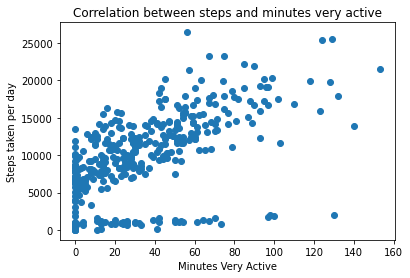

In [72]:
plt.scatter(fitbit['Minutes Very Active'], fitbit.Steps)
plt.title('Correlation between steps and minutes very active')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps taken per day')
plt.show()

In [79]:
chunk = fitbit[['Minutes Lightly Active', 'Minutes Fairly Active', 'Minutes Very Active', 'Steps']]

In [80]:
chunk[chunk['Minutes Very Active']==0]

,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Steps
0,46,0,0,905
4,171,0,0,502
17,200,0,0,5109
18,156,0,0,443
21,208,0,0,565
65,258,16,0,758
84,198,7,0,9194
96,70,0,0,1883
100,267,0,0,6238
114,0,0,0,11924


In [81]:
chunk[chunk['Steps']<=1000]

,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Steps
0,46,0,0,905
4,171,0,0,502
5,172,34,18,779
9,186,46,73,852
18,156,0,0,443
20,212,8,13,849
21,208,0,0,565
33,220,20,4,714
65,258,16,0,758
76,234,23,23,909


#### What can you say about `Minutes Very Active` and `Steps`? Write a comment below.

In [82]:
"""
The correlation is only around 0.6, which is not as strong as expected.
- From the graph, it appears that there's a big chunk of days when the recording of 'Minutes Very Active' is not
correlated with the steps at all. There are days with e.g. over 5000 steps but Minutes Very Active is 0
- The other way around is also true.
All in all, it might point to the fact that Steps might be correlated with the other types of recorded active minutes
or eventually the sum of them all
"""

"\nThe correlation is only around 0.6, which is not as strong as expected.\n- From the graph, it appears that there's a big chunk of days when the recording of 'Minutes Very Active' is not\ncorrelated with the steps at all. There are days with e.g. over 5000 steps but Minutes Very Active is 0\n- The other way around is also true.\nAll in all, it might point to the fact that Steps might be correlated with the other types of recorded active minutes\nor eventually the sum of them all\n"

#### We also suspect that there must be a linear relationship between the `Minutes Sedentary` and the `Steps`. Compute the correlation between these variables.

In [83]:
fitbit['Minutes Sedentary'].corr(fitbit.Steps)

0.07690608062990092

#### Use matplotlib to visually plot `Minutes Sedentary` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

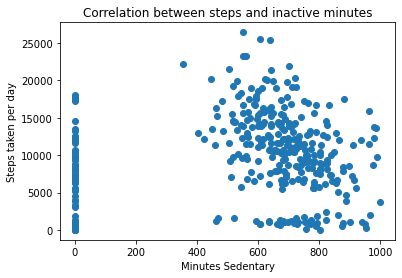

In [84]:
plt.scatter(fitbit['Minutes Sedentary'], fitbit.Steps)
plt.title('Correlation between steps and inactive minutes')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps taken per day')
plt.show()

In [ ]:
"""
There is no correlation between Minutes Sedentary and Steps
"""

#### We also suspect that there must be a linear relationship between the `MinutesOfSleep` and the `Steps`. Compute the correlation between these variables.

In [85]:
fitbit['MinutesOfSleep'].corr(fitbit.Steps)

0.13098565950836386

#### Use matplotlib to visually plot `MinutesOfSleep` vs `Steps`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

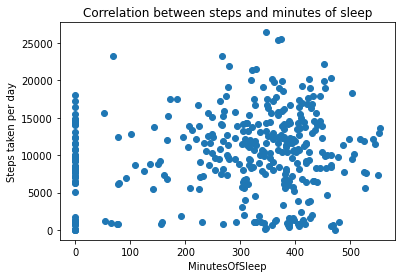

In [86]:
plt.scatter(fitbit['MinutesOfSleep'], fitbit.Steps)
plt.title('Correlation between steps and minutes of sleep')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps taken per day')
plt.show()

In [ ]:
"""
There is no correlation between Minutes Sedentary and Steps
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`.

In [87]:
columns = ['Calorie burned', 'Steps', 'Floors', 'Minutes Sedentary', 'Minutes Very Active', 'MinutesOfSleep']

In [88]:
fitbit_subset = fitbit[columns]

In [91]:
cor_fit = fitbit_subset.corr()
cor_fit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix, which of the features are highly correlated with variable `Steps`?
**Hint**: sort the correlations of `Steps` vs the rest of the features in descending order. You can use Pandas `sort_values`. 

In [92]:
cor_fit.Steps.sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

Read the `time_grades` dataset from the `data` folder


Save your data in a variable called `time_grades`.

In [94]:
time_grades = pd.read_csv('../data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the `time_grades` dataset.

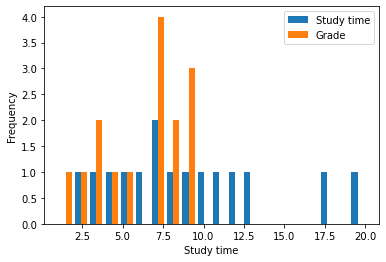

In [109]:
plt.hist(time_grades[['Study time', 'Grade']], label=time_grades[['Study time', 'Grade']].columns, bins=20)
plt.xlabel('Study time')
plt.ylabel('Frequency')
plt.legend()
plt.show()

#### Is there a correlation between `Study time` and `Grade`? Use both Pearson and Spearman correlations and comment your results.

In [111]:
time_grades['Study time'].corr(time_grades.Grade, method='pearson')

0.7980456073578857

In [113]:
time_grades['Study time'].corr(time_grades.Grade, method='spearman')

0.819658753036942

In [ ]:
"""
There appears to be strong correlation, both linear (Pearson) and non-linear (Spearman) relationship 
between the two parameters
"""

#### Use matplotlib to visually plot `Study time` vs `Grade`. Based on the results of the computed correlation and the plot, what can you say about these 2 variables?

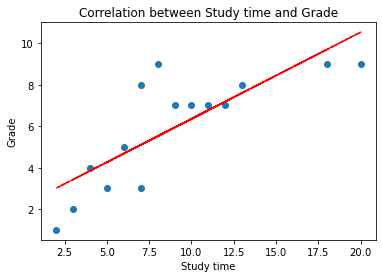

In [121]:
plt.scatter(time_grades['Study time'], time_grades.Grade)
plt.title('Correlation between Study time and Grade')
plt.xlabel('Study time')
plt.ylabel('Grade')
z = np.polyfit(time_grades['Study time'], time_grades.Grade, 1)
p = np.poly1d(z)
plt.plot(time_grades['Study time'],p(time_grades['Study time']),"r-.")
plt.show()

In [ ]:
"""
the graph shows a strong positive correlation between study time and grade.
it appears the higher the study time, the higher the grade
"""

#### Could you explain the difference between Pearson and Spearman correlations?

In [122]:
"""
Pearson: to measure linear correlation. Tends to be sentive to outliers
Spearman: not a measure of linear correlation. Therefore less sensitive towards outliers. Besides, it is based on
ranking of the values in each parameter, which is then assessed for correlation using Pearson principle.
"""

'\nPearson: to measure linear correlation. Tends to be sentive to outliers\nSpearman: not a measure of linear correlation. Therefore less sensitive towards outliers. Besides, it is based on\nranking of the values in each parameter, which is then assessed for correlation using Pearson principle.\n'